In [1]:
import gensim

In [2]:
from gensim import models

In [3]:
import numpy as np

In [4]:
w2v = models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, euclidean_distances

In [6]:
import pickle as pkl

In [7]:
from collections import defaultdict

In [8]:
from tqdm import tqdm

In [9]:
from scipy.stats import pearsonr

In [10]:
#Add RG65 words
rg_data = [('cord', 'smile', 0.02), ('rooster', 'voyage', 0.04), ('noon', 'string', 0.04), ('fruit', 'furnace', 0.05),
           ('autograph', 'shore', 0.06), ('automobile', 'wizard', 0.11), ('mound', 'stove', 0.14), ('grin', 'implement', 0.18),
           ('asylum', 'fruit', 0.19), ('asylum', 'monk', 0.39), ('graveyard', 'madhouse', 0.42), ('glass', 'magician',0.44),
          ('boy', 'rooster', 0.44), ('cushion', 'jewel', 0.45), ('monk', 'slave', 0.57), ('asylum', 'cemetery', 0.79), 
          ('coast', 'forest', 0.85), ('grin', 'lad', 0.88), ('shore', 'woodland', 0.90), ('monk', 'oracle', 0.91), ('boy', 'sage', 0.96),
          ('automobile', 'cushion', 0.97), ('mound','shore',0.97), ('lad', 'wizard', 0.99), ('forest', 'graveyard', 1.0), 
          ('food', 'rooster', 1.09), ('cemetery', 'woodland', 1.18), ('shore', 'voyage', 1.22), ('bird', 'woodland', 1.24),
          ('coast', 'hill', 1.26), ('furnace', 'implement', 1.37), ('crane', 'rooster', 1.41), ('hill', 'woodland', 1.48),
          ('car', 'journey', 1.55), ('cemetery', 'mound', 1.69), ('glass', 'jewel', 1.78), ('magician', 'oracle', 1.82), 
          ('crane', 'implement', 2.37), ('brother', 'lad', 2.41), ('sage', 'wizard', 2.46), ('oracle', 'sage', 2.61), 
          ('bird', 'crane', 2.63), ('bird', 'cock', 2.63), ('food', 'fruit', 2.69), ('brother', 'monk', 2.74), ('asylum', 'madhouse', 3.04),
          ('furnace', 'stove', 3.11), ('magician', 'wizard', 3.21), ('hill', 'mound', 3.29), ('cord', 'string', 3.41), 
          ('glass', 'tumbler', 3.45), ('grin', 'smile', 3.46), ('serf', 'slave', 3.46), ('journey', 'voyage', 3.58), 
          ('autograph', 'signature', 3.59), ('coast', 'shore', 3.60), ('forest', 'woodland', 3.65), ('implement', 'tool', 3.66),
          ('cock', 'rooster', 3.68), ('boy', 'lad', 3.82), ('cushion', 'pillow', 3.84), ('cemetery', 'graveyard', 3.88), 
          ('automobile', 'car', 3.92), ('midday', 'noon', 3.94), ('gem', 'jewel', 3.94)] 

In [11]:
rg_words = []
for pair in rg_data:
    rg_words.extend([pair[0], pair[1]])
rg_words = list(set(rg_words))

In [12]:
print(len(rg_words))

48


In [13]:
embeddings = []
for word in rg_words:
    embeddings.append(w2v.get_vector(word))

In [14]:
w2i = {}
for i, w in enumerate(rg_words):
    w2i[w] = i

In [15]:
print(len(embeddings))

48


In [16]:
np.shape(embeddings)

(48, 300)

In [14]:
s1 = 'dog'
s2 = 'cat'
vec1 = w2v.get_vector(s1)
vec2 = w2v.get_vector(s2)
    
sim1 = w2v.similarity(s1, s2)
sim2 = w2v.cosine_similarities(vec1, [vec2])

In [15]:
print(sim1)

0.7609457089782209


In [16]:
print(sim2)

[0.76094574]


In [17]:
cosine_sims = []
human_sims = []

for pair in rg_data:
    cosine_sim = w2v.similarity(pair[0], pair[1])
    cosine_sims.append(cosine_sim)
    
    human_sims.append(pair[2])

In [18]:
from scipy.stats import pearsonr

In [19]:
pr_wv = pearsonr(cosine_sims, human_sims)
print(pr_wv)

(0.7720616150731, 5.0910642245118356e-14)


In [20]:
#word analogies
with open('word-test.v1.txt', 'r') as f:
    lines = f.readlines()
lines = [x.strip() for x in lines]

In [21]:
len(lines)

19559

In [ ]:
lines[:5]

In [22]:
lines = lines[1:]

In [23]:
lines[0][1:]

' capital-common-countries'

In [24]:
cat_pairs = {}
for line in lines:
    if line[0] == ':':
        category = line[1:].strip()
        if category not in cat_pairs:
            cat_pairs[category] = []
    else:
        w1, w2, w3, w4 = line.split(" ")
        cat_pairs[category].append([(w1, w2), (w3,w4)])
        
        

In [25]:
cat_pairs.keys()

dict_keys(['capital-common-countries', 'capital-world', 'currency', 'city-in-state', 'family', 'gram1-adjective-to-adverb', 'gram2-opposite', 'gram3-comparative', 'gram4-superlative', 'gram5-present-participle', 'gram6-nationality-adjective', 'gram7-past-tense', 'gram8-plural', 'gram9-plural-verbs'])

In [26]:
cat_keys = list(cat_pairs.keys())
print(cat_keys)

['capital-common-countries', 'capital-world', 'currency', 'city-in-state', 'family', 'gram1-adjective-to-adverb', 'gram2-opposite', 'gram3-comparative', 'gram4-superlative', 'gram5-present-participle', 'gram6-nationality-adjective', 'gram7-past-tense', 'gram8-plural', 'gram9-plural-verbs']


In [27]:
cat_types = {}
for i, cat in enumerate(cat_keys):
    if i < 5:
        cat_types[cat] = 'semantic'
    else:
        cat_types[cat] = 'syntactic'
    

In [96]:
#LSA300
lsa_300 = pkl.load(open('../lab0/pca_300_mat.pkl', 'rb'))
print(lsa_300.shape)

(5031, 300)


In [30]:
lsa_w2i = pkl.load(open('../lab0/w2ind.pkl', 'rb'))
print(len(lsa_w2i))

5031


In [31]:
lsa_i2w = {}
for w, i in lsa_w2i.items():
    lsa_i2w[i] = w

In [107]:
#save to file
with open('lsa_300.txt', 'w') as f:
    print(len(lsa_w2i), 300, file=f)
    for word, ind in lsa_w2i.items():
        print(word, end=" ", file = f)
        for num in lsa_300[ind]:
            print(num, end =" ", file = f)
        print("\n", end = "", file = f)


In [28]:
lsa2vec = gensim.models.KeyedVectors.load_word2vec_format('./lsa_300.txt', binary=False)

In [109]:
lsa_i2w[0]

'grow'

In [110]:
v1 = lsa2vec.get_vector('grow')
v2 = lsa_300[0]
print(np.shape(v1), np.shape(v2))

(300,) (300,)


In [ ]:
#get cosine similarity matrix
lsa_sims = cosine_similarity([lsa_300[0]], lsa_300)

In [ ]:
print(lsa_sims.shape)

In [ ]:
lsa_sims[0][0], lsa_sims[0][10]

In [ ]:
np.argmax(lsa_sims[0][1:])

In [62]:
lsa_i2w[0], lsa_i2w[20], lsa_i2w[22]

('grow', 'freight', "world's")

In [60]:
res = lsa_300[0] + lsa_300[20] - lsa_300[22]
res.shape

(300,)

In [33]:
res = embeddings[0] + embeddings[20] - embeddings[22]
res.shape

(300,)

# Commented

## End Comments

## Analogy

In [32]:
sem_pairs = []
syn_pairs = []

w2v_acc = defaultdict(list)
lsa_acc = defaultdict(list)

for key, pairs in tqdm(cat_pairs.items()):
    
    cat = cat_types[key]
    
    for pair in tqdm(pairs):
        w1, w2 = pair[0]
        w3, w4 = pair[1]
        
        if (w1 in lsa_w2i) and (w2 in lsa_w2i) and (w3 in lsa_w2i) and (w4 in lsa_w2i):
            if cat == 'semantic':
                sem_pairs.append([(w1, w2), (w3, w4)])
            else:
                syn_pairs.append([(w1, w2), (w3, w4)])
            
            #w2v
            res_word = w2v.most_similar(positive=[w3, w2], negative=[w1], topn=1)
            if res_word[0][0] == w4:
                w2v_acc[key].append(1)
            else:
                w2v_acc[key].append(0)
                
            
            #lsa
            res_word = lsa2vec.most_similar(positive=[w3,w2], negative=[w1], topn=1)
            if res_word[0][0] == w4:
                lsa_acc[key].append(1)
            else:
                lsa_acc[key].append(0)
            

  4%|▍         | 47/1122 [00:01<00:29, 35.88it/s]


 60%|██████    | 937/1560 [00:49<00:32, 19.02it/s]


 47%|████▋     | 410/870 [00:12<00:13, 33.69it/s]


100%|██████████| 14/14 [05:02<00:00, 21.58s/it]s]


In [93]:
print(len(syn_pairs), len(sem_pairs))

1895 104


In [33]:
total = 0
correct = 0

for cat, scores in w2v_acc.items():
    print(cat, len(scores), np.sum(scores), np.sum(scores)/len(scores), sep='\t')
    total += len(scores)
    correct += np.sum(scores)
print("Total: ", total, correct, correct/total, sep='\t')

capital-common-countries	8	7	0.875
capital-world	3	3	1.0
city-in-state	37	32	0.8648648648648649
family	56	49	0.875
gram1-adjective-to-adverb	272	84	0.3088235294117647
gram2-opposite	20	4	0.2
gram3-comparative	210	177	0.8428571428571429
gram4-superlative	30	27	0.9
gram5-present-participle	272	213	0.7830882352941176
gram6-nationality-adjective	53	46	0.8679245283018868
gram7-past-tense	600	441	0.735
gram8-plural	306	249	0.8137254901960784
gram9-plural-verbs	132	105	0.7954545454545454
Total: 	1999	1437	0.7188594297148574


In [34]:
total = 0
correct = 0
for cat, scores in lsa_acc.items():
    print(cat, len(scores), np.sum(scores), np.sum(scores)/len(scores), sep='\t')
    total += len(scores)
    correct += np.sum(scores)
print("Total: ", total, correct, correct/total, sep='\t')

capital-common-countries	8	0	0.0
capital-world	3	0	0.0
city-in-state	37	0	0.0
family	56	8	0.14285714285714285
gram1-adjective-to-adverb	272	0	0.0
gram2-opposite	20	0	0.0
gram3-comparative	210	54	0.2571428571428571
gram4-superlative	30	4	0.13333333333333333
gram5-present-participle	272	30	0.11029411764705882
gram6-nationality-adjective	53	1	0.018867924528301886
gram7-past-tense	600	93	0.155
gram8-plural	306	5	0.016339869281045753
gram9-plural-verbs	132	13	0.09848484848484848
Total: 	1999	208	0.1040520260130065


## Diachronic 

In [78]:
with open('./data.pkl', 'rb') as f:
    data = pkl.load(f)

In [ ]:
type(data)

In [10]:
data.keys()

dict_keys(['w', 'd', 'E'])

In [14]:
print(data['d'][:10])

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]


In [15]:
print(data['w'][:10])

['time', 'man', 'years', 'part', 'way', 'life', 'people', 'work', 'world', 'states']


In [16]:
print(len(data['w']), len(data['d']))

2000 10


In [94]:
print(len(data['E']), len(data['E'][0]), len(data['E'][0][0]))

2000 10 300


In [95]:
#absolute cosine shift
cosine_dists = np.zeros((len(data['w']), len(data['d'])))

In [96]:
for i, word in enumerate(data['w']):
    for j, time in enumerate(data['d']):
        emb_0 = data['E'][i][0]
        emb_cur = data['E'][i][j]
        
        cosine_dist = cosine_distances([emb_0], [emb_cur])
        
        cosine_dists[i][j] = cosine_dist[0][0]
        
        

In [59]:
cosine_dists[10]

array([1.11022302e-16, 2.40042536e-01, 2.76247899e-01, 3.10148051e-01,
       3.39879228e-01, 3.80664127e-01, 3.51987662e-01, 4.13233229e-01,
       4.41934162e-01, 4.45843819e-01])

In [97]:
cosine_dists[1729]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [98]:
#to previous time period
seq_cosine_dists = np.zeros((len(data['w']), len(data['d'])))

for i, word in enumerate(data['w']):
    for j, time in enumerate(data['d']):
        prev = max(0, j-1)
        emb_0 = data['E'][i][prev]
        emb_cur = data['E'][i][j]
        
        cosine_dist = cosine_distances([emb_0], [emb_cur])
        
        seq_cosine_dists[i][j] = cosine_dist[0][0]
        
        

In [71]:
seq_cosine_dists[10][0]

1.1102230246251565e-16

In [74]:
seq_cosine_dists[1729][0]

1.0

In [75]:
cosine_distances([data['E'][1729][0]], [data['E'][1729][0]])

array([[1.]])

In [81]:
data['E'][10][0]

array([-1.81055476e-03, -1.54139611e-01, -4.26769624e-03,  3.06172588e-02,
       -2.72900091e-02, -9.67188421e-03, -3.63618990e-02, -1.00950152e-01,
       -8.84866629e-02,  2.21253273e-02,  1.23566761e-01,  1.41228497e-02,
       -1.15203107e-01,  3.30992802e-02, -4.68502684e-03, -1.00116137e-01,
       -6.54667459e-02, -6.77952637e-02, -5.30799892e-02, -3.55191222e-02,
        9.97434254e-03,  9.11105966e-02, -4.71750646e-02,  3.18980588e-02,
        9.58000002e-02, -1.05769928e-02,  5.91897595e-03, -1.01981655e-01,
       -6.85238753e-04,  3.47827863e-02, -8.34751329e-02, -2.97091614e-02,
        9.59759524e-02, -2.37337241e-02, -8.50445282e-02, -3.05751388e-02,
        2.50523646e-02, -7.58439886e-02, -7.44064012e-04, -1.60911086e-03,
       -2.25092512e-02, -1.27947188e-02,  5.69754014e-02,  1.69191381e-02,
        9.44243246e-02,  4.45309344e-03,  4.12073632e-02,  8.20883686e-02,
       -2.27110429e-02, -4.20916226e-03,  3.45436625e-02,  4.65754250e-02,
       -8.05923641e-02,  

In [77]:
cosine_similarity([data['E'][1729][0]], [data['E'][1729][0]])

array([[0.]])

In [114]:
#closest words
nn_10 = []
for j, time_period in enumerate(data['d']):
    nn_10.append([])
    emb_matrix = np.zeros((len(data['w']), 300))
    for i, w in enumerate(data['w']):
        emb_matrix[i] = data['E'][i][j]
    
    cosine_sims = cosine_similarity(emb_matrix)
    
    for i, word in enumerate(data['w']):
        top_ind = np.argsort(cosine_sims[i])[::-1]
        top_10 = []
        ind = 0
        while len(top_10) < 10:
            if top_ind[ind] != i:
                top_10.append(top_ind[ind])
            ind += 1
        
        assert len(top_10) == 10
                
        nn_10[j].append(top_10)

In [115]:
print(len(nn_10), len(nn_10[0]), len(nn_10[0][0]), nn_10[0][0], nn_10[1][0])


10 2000 10 [47, 1571, 51, 2, 164, 451, 1013, 21, 11, 200] [51, 47, 451, 164, 1571, 2, 136, 1013, 21, 1598]


In [40]:
#measure change
#matrices: cosine_dists, seq_cosine_dists, nn_10
#first: cosine_dists

In [41]:
print(np.shape(cosine_dists))

(2000, 10)


In [42]:
np.shape(cosine_dists[:,-1])

(2000,)

In [103]:
final_dists = cosine_dists[:, -1]
sorted_args = np.argsort(final_dists)
most_changing = sorted_args[::-1][:20]
least_changing = sorted_args[:20]

most_words = [data['w'][i] for i in most_changing]
least_words = [data['w'][i] for i in least_changing]

print("MOST: ", most_words)
print("LEAST: ", least_words)

most_scores = [final_dists[i] for i in most_changing]
least_scores = [final_dists[i] for i in least_changing]

MOST:  ['mcgraw', 'skills', 'ml', 'techniques', 'programs', 'objectives', 'computer', 'radio', 'sector', 'goals', 'approach', 'van', 'shri', 'media', 'impact', 'perspective', 'patterns', 'berkeley', 'shift', 'film']
LEAST:  ['april', 'june', 'november', 'february', 'years', 'october', 'increase', 'january', 'century', 'months', 'daughter', 'december', 'god', 'september', 'feet', 'week', 'evening', 'door', 'payment', 'miles']


In [104]:
np.shape(final_dists)

(2000,)

In [44]:
#second: sequential distances
np.shape(seq_cosine_dists)

(2000, 10)

In [105]:
total_changes = np.sum(seq_cosine_dists, axis = 1)
np.shape(total_changes)

(2000,)

In [106]:
sorted_args = np.argsort(total_changes)
most_changing2 = sorted_args[::-1][:20]
least_changing2 = sorted_args[:20]

most_words2 = [data['w'][i] for i in most_changing2]
least_words2 = [data['w'][i] for i in least_changing2]

print("MOST: ", most_words2)
print("LEAST: ", least_words2)

most_scores2 = [total_changes[i] for i in most_changing2]
least_scores2 = [total_changes[i] for i in least_changing2]

MOST:  ['shri', 'computer', 'skills', 'mcgraw', 'ml', 'techniques', 'harper', 'jones', 'sector', 'berkeley', 'wiley', 'baltimore', 'martin', 'princeton', 'wilson', 'adams', 'therapy', 'johnson', 'goals', 'haven']
LEAST:  ['april', 'miles', 'november', 'september', 'january', 'december', 'february', 'university', 'vessels', 'trees', 'cent', 'solution', 'july', 'decrease', 'october', 'temperature', 'buildings', 'june', 'patients', 'blood']


In [54]:
#third: word clusters


In [116]:

prop_diff = []
for i, word in enumerate(data['w']):
    zero_nn = nn_10[0][i]
    final_nn = nn_10[-1][i]
    
    num_same = len(set(zero_nn).intersection(set(final_nn)))
    num_diff = len(zero_nn) - num_same
    prop_diff.append(num_diff/len(zero_nn))

In [117]:
len(prop_diff), prop_diff[0]

(2000, 0.1)

In [63]:
sorted_args = np.argsort(prop_diff)
most_changing3 = sorted_args[::-1][:20]
least_changing3 = sorted_args[:20]

most_words3 = [data['w'][i] for i in most_changing3]
least_words3 = [data['w'][i] for i in least_changing3]

print("MOST: ", most_words3)
print("LEAST: ", least_words3)

most_scores3 = [prop_diff[i] for i in most_changing3]
least_scores3 = [prop_diff[i] for i in least_changing3]

MOST:  ['assessment', 'focus', 'programs', 'approach', 'sector', 'techniques', 'personality', 'disposition', 'radio', 'representation', 'ml', 'intelligence', 'mcgraw', 'signal', 'housing', 'skills', 'computer', 'objectives', 'adjustment', 'framework']
LEAST:  ['september', 'november', 'august', 'october', 'december', 'february', 'april', 'january', 'july', 'june', 'march', 'everybody', 'h', 'cup', 'george', 'thomas', 'san', 'e', 'east', 'windows']


#### Accuracy

In [69]:
# ????????????????
# Is method 3 more apt as a measure of accuracy?
#Then alternative measure of change: euclidean distance between similarity vectors 
len(data['E'])

2000

In [121]:
dist_vectors = []
for j, time_period in enumerate(data['d']):
    
    emb_matrix = np.zeros((len(data['w']), 300))
    for i, w in enumerate(data['w']):
        emb_matrix[i] = data['E'][i][j]
    
    cosine_dist = cosine_distances(emb_matrix)
    
    dist_vectors.append(cosine_dist)
    
    

In [122]:
print(len(dist_vectors), len(dist_vectors[0]), len(dist_vectors[0][0]))

10 2000 2000


In [109]:
#euclidean distances
euc_dists = []
for i, word in enumerate(data['w']):
    zero_vec = dist_vectors[0][i]
    final_vec = dist_vectors[-1][i]
    
    euc = cosine_distances([zero_vec], [final_vec])
    
    euc_dists.append(euc[0][0])

In [123]:
all_dists = []
for i, word in enumerate(data['w']):
    all_dists.append([])
    for j, time in enumerate(data['d']):
        prev = max(0, j-1)
        prev_vec = dist_vectors[prev][i]
        cur_vec = dist_vectors[j][i]
        
        cos_d = cosine_distances([prev_vec], [cur_vec])
        
        all_dists[i].append(cos_d[0][0])

In [125]:
print(len(all_dists), len(all_dists[0]), all_dists[0])

2000 10 [0.0, 0.0015066560335905699, 0.0012573605237482521, 0.0013647415730730916, 0.001317781490017822, 0.001710399674004881, 0.001762938463642394, 0.001405201815395829, 0.0014719879573240613, 0.0014525629502947224]


In [110]:
np.shape(euc_dists)

(2000,)

In [81]:
sorted_args = np.argsort(euc_dists)
most_changing4 = sorted_args[::-1][:20]
least_changing4 = sorted_args[:20]

most_words4 = [data['w'][i] for i in most_changing4]
least_words4 = [data['w'][i] for i in least_changing4]

print("MOST: ", most_words4)
print("LEAST: ", least_words4)

most_scores4 = [euc_dists[i] for i in most_changing4]
least_scores4 = [euc_dists[i] for i in least_changing4]

MOST:  ['impact', 'approach', 'objectives', 'programs', 'radio', 'sector', 'assessment', 'goals', 'film', 'model', 'framework', 'perspective', 'techniques', 'patterns', 'signal', 'computer', 'economy', 'models', 'levels', 'pattern']
LEAST:  ['imprisonment', 'months', 'weather', 'dozen', 'shoulders', 'stairs', 'shoulder', 'season', 'hours', 'eyes', 'weeks', 'hope', 'hat', 'anyone', 'trees', 'evening', 'oath', 'morning', 'vessels', 'judgment']


In [111]:
pearsonr(final_dists, total_changes)

(0.7016806857714594, 1.8159631083935847e-296)

In [112]:
pearsonr(final_dists, euc_dists)

(0.6384488007169163, 1.888971850317996e-229)

In [113]:
pearsonr(total_changes, euc_dists)

(0.3642617974902805, 8.445357332998497e-64)

In [118]:
pearsonr(final_dists, prop_diff)

(0.44896340129273726, 8.592983139439329e-100)

In [119]:
pearsonr(total_changes, prop_diff)

(0.21699762848166249, 9.651638239967522e-23)

In [120]:
pearsonr(euc_dists, prop_diff)

(0.48336970666119583, 1.2925388166070766e-117)

## Most "accurate": method 1

In [126]:
sorted_args = np.argsort(euc_dists)
# most_changing = sorted_args[::-1][:20]
# least_changing = sorted_args[:20]

# most_words = [data['w'][i] for i in most_changing]
# least_words = [data['w'][i] for i in least_changing]

# print("MOST: ", most_words)
# print("LEAST: ", least_words)

# most_scores = [final_dists[i] for i in most_changing]
# least_scores = [final_dists[i] for i in least_changing]
top_3 = sorted_args[::-1][:3]
top_3_words = [data['w'][i] for i in top_3]
print(top_3_words)
print(top_3)

['impact', 'approach', 'objectives']
[1019  501 1673]


In [86]:
data['E'][1668][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
cosine_dists[1729]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [128]:
#to previous time period
top3_seq = np.zeros((len(top_3), len(data['d'])))

for i, ind in enumerate(top_3):
    top3_seq[i] = all_dists[ind]

In [129]:
np.shape(top3_seq)

(3, 10)

In [130]:
top3_seq[0]

array([0.        , 0.00141184, 0.00118534, 0.00138388, 0.00143693,
       0.00123905, 0.00137249, 0.0013714 , 0.00103471, 0.00100373])

In [87]:
top3_seq[0][0] == 1.0

True

In [ ]:
import matplotlib.pyplot as plt

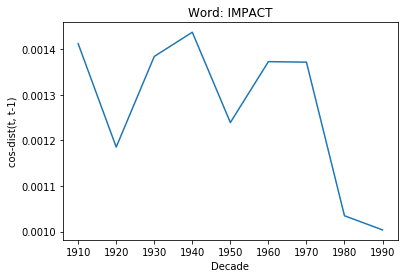

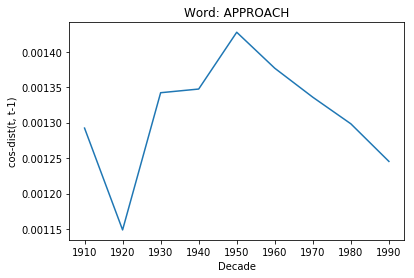

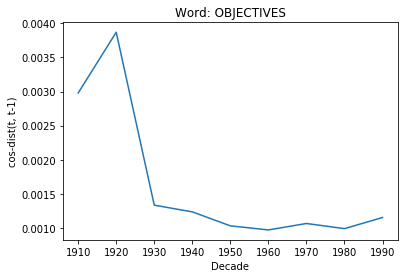

In [132]:
#plot
for i, row in enumerate(top3_seq):
    plt.figure()
    plt.plot(data['d'][1:], row[1:])
    plt.xlabel("Decade")
    plt.ylabel("cos-dist(t, t-1)")
    plt.title("Word: " + top_3_words[i].upper())
    plt.show()

In [137]:
#max delta
#ignoring 1
for i, row in enumerate(top3_seq):
#     max_cons = []
#     for val in row:
#         if val == 1.0:
#             max_cons.append(0)
#         else:
#             max_cons.append(val)
    diffs = []
    for j, val in enumerate(row[1:]):
        p = max(1, j-1)
        diffs.append(abs(val - row[p]))
    print(diffs)
    max_ind = np.argmax(diffs)
    
    print(top_3_words[i], data['d'][max_ind])

[0.0, 0.00022649915630656992, 2.7955992755179793e-05, 0.0002515923799700781, 0.00014483129383813242, 6.444678544814675e-05, 0.00013235097006270014, 0.0003377760924274664, 0.0003676784516167819]
impact 1980
[0.0, 0.00014352670774053777, 4.9870805236329474e-05, 0.0001985808325287719, 8.52547783996016e-05, 2.93447123463908e-05, 9.159735959185511e-05, 7.837684170031167e-05, 9.04814422475475e-05]
approach 1930
[0.0, 0.0008904202170916253, 0.0016421115592972768, 0.002630897583149938, 0.0003031129245534281, 0.0002643056170674729, 3.462238050444544e-05, 1.884250928518849e-05, 8.765831987267436e-05]
objectives 1930
